In [1]:
library(Seurat)
library(dplyr)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [5]:
seurat_obj_sbc <- readRDS("/nfs/lab/parulk/PanKbase_v3.3/02072026_scRNA_v4.0.rds")

=== PLOTTING UMAP WITH CELL_TYPE ===

✓ Cell_Type column found

Unique Cell Types:

            Acinar    Active Stellate              Alpha               Beta 
             50105              16907             194443             120502 
     Cycling Alpha              Delta             Ductal        Endothelial 
              2738              11680              33686               3385 
   Gamma + Epsilon             Immune      MUC5B+ Ductal Quiescent Stellate 
              7087               2755               3515               2132 

Total cell types: 12 

✓ UMAP reduction found

Creating UMAP plot...


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`




Saving plot to: /nfs/lab/parulk/PanKbase_v3.3/umap_cell_type.pdf 
✓ Plot saved


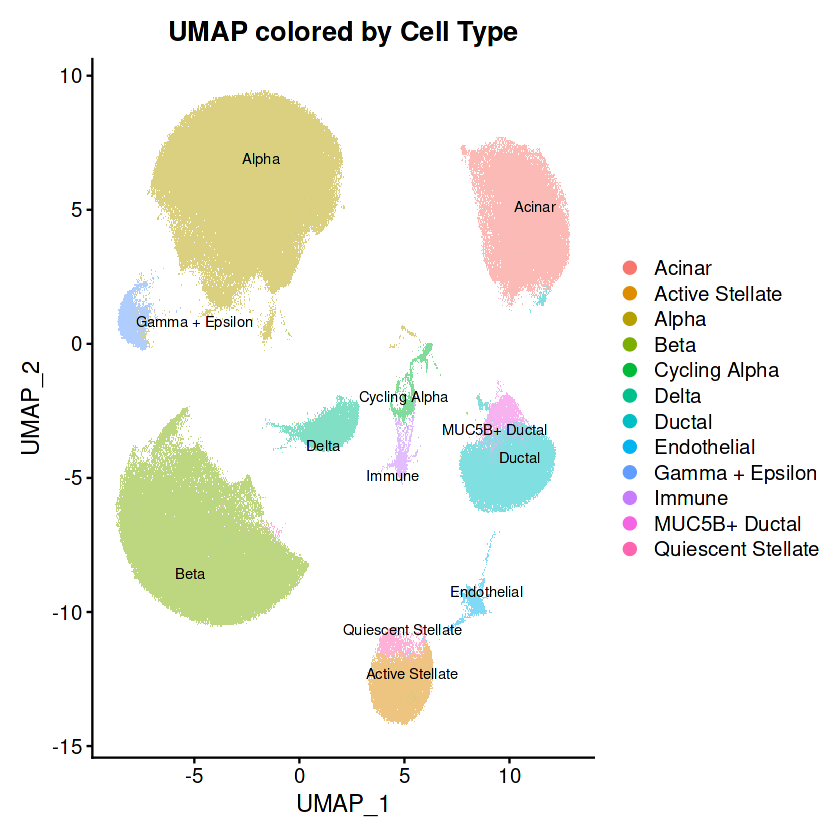

In [6]:
# ============================================================================
# PLOT UMAP WITH CELL_TYPE LABELS
# ============================================================================
library(ggplot2)

cat("=== PLOTTING UMAP WITH CELL_TYPE ===\n\n")

# Check if Cell_Type column exists
if ("Cell_Type" %in% colnames(seurat_obj_sbc@meta.data)) {
  
  cat("✓ Cell_Type column found\n\n")
  
  # Check unique cell types
  cat("Unique Cell Types:\n")
  cell_type_counts <- table(seurat_obj_sbc@meta.data$Cell_Type, useNA = "ifany")
  print(cell_type_counts)
  
  cat("\nTotal cell types:", length(unique(seurat_obj_sbc@meta.data$Cell_Type)), "\n\n")
  
  # Check if UMAP exists
  if ("umap" %in% names(seurat_obj_sbc@reductions)) {
    
    cat("✓ UMAP reduction found\n\n")
    
    # Create UMAP plot
    cat("Creating UMAP plot...\n")
    
    p <- DimPlot(seurat_obj_sbc, 
                 reduction = "umap", 
                 group.by = "Cell_Type",
                 label = TRUE,           # Add labels to clusters
                 label.size = 3,         # Label text size
                 repel = TRUE,           # Repel labels to avoid overlap
                 pt.size = 0.5) +        # Point size
      ggtitle("UMAP colored by Cell Type") +
      theme(plot.title = element_text(hjust = 0.5, face = "bold"))
    
    #print(p)
    
    # Save plot
    output_plot <- "/nfs/lab/parulk/PanKbase_v3.3/umap_cell_type.pdf"
    
    cat("\nSaving plot to:", output_plot, "\n")
    
    ggsave(output_plot, 
           plot = p, 
           width = 12, 
           height = 10, 
           dpi = 300)
    
    cat("✓ Plot saved\n")
    
  } else {
    cat("✗ UMAP reduction not found\n")
    cat("Available reductions:\n")
    print(names(seurat_obj_sbc@reductions))
    
    cat("\nYou need to run UMAP first:\n")
    cat("  seurat_obj_sbc <- RunUMAP(seurat_obj_sbc, dims = 1:30)\n")
  }
  
} else {
  cat("✗ Cell_Type column not found\n")
  
  # Search for similar column names
  cat("\nSearching for cell type columns...\n")
  cell_cols <- grep("cell|type|annot|cluster", 
                    colnames(seurat_obj_sbc@meta.data), 
                    value = TRUE, 
                    ignore.case = TRUE)
  
  if (length(cell_cols) > 0) {
    cat("Possible cell type columns:\n")
    for (col in cell_cols) {
      cat(sprintf("  - %s\n", col))
    }
    
    cat("\nTo plot with a different column, use:\n")
    cat("  DimPlot(seurat_obj_sbc, reduction = 'umap', group.by = 'column_name')\n")
  } else {
    cat("No obvious cell type columns found\n")
  }
}

In [7]:
colnames(seurat_obj_sbc@meta.data)

[1] "ncount_rna"                                         
 [2] "nfeature_rna"                                       
 [3] "rna_total_reads"                                    
 [4] "rna_uniquely_mapped_reads"                          
 [5] "rna_secondary_alignments"                           
 [6] "rna_umis"                                           
 [7] "rna_pct_mitochondrial"                              
 [8] "samples"                                            
 [9] "barcodes"                                           
[10] "treatments"                                         
[11] "chemistry"                                          
[12] "source"                                             
[13] "center_donor_id"                                    
[14] "rrid"                                               
[15] "donor_accession"                                    
[16] "sex"                                                
[17] "age_.years."                                        
[18] "bmi"                                                
[19] "c_peptide_.ng.ml."                                  
[20] "cause_of_death"                                     
[21] "reported_ethnicity"                                 
[22] "description_of_diabetes_status"                     
[23] "diabetes_duration_.years."                          
[24] "hba1c_.percentage."                                 
[25] "family_history_of_diabetes"                         
[26] "family_history_of_diabetes_relationship"            
[27] "aab_gada_positive"                                  
[28] "aab_gada_value_.unit.ml."                           
[29] "aab_ia2_positive"                                   
[30] "aab_ia2_value_.unit.ml."                            
[31] "aab_znt8_positive"                                  
[32] "aab_znt8_value_.unit.ml."                           
[33] "aab_iaa_positive"                                   
[34] "aab_iaa_value_.unit.ml."                            
[35] "biosample_accession"                                
[36] "biosample_cold_ischaemia_time_.hours."              
[37] "biosample_hand_picked"                              
[38] "islet_function_available"                           
[39] "ieq_pancreas_weight_.grams."                        
[40] "islet_yield_ieq"                                    
[41] "organ_source"                                       
[42] "isolation_center"                                   
[43] "biosample_warm_ischaemia_duration_down_time_.hours."
[44] "hospital_stay_.hours."                              
[45] "donation_type"                                      
[46] "Cell_Type"                                          
[47] "study"                                              
[48] "RNA_snn_res.1.8"                                    
[49] "rna_supplementary_alignments"                       
[50] "cell_probability"                                   
[51] "post_cellbender_umis"                               
[52] "pct_cellbender_removed"                             
[53] "coarse_annot"                                       
[54] "samples_split"                                      
[55] "idx"                                                
[56] "collections"                                        
[57] "derived_diabetes_status"                            
[58] "predicted_genetic_ancestry"                         
[59] "genetic_sex"                                        
[60] "t1d_stage"                                          
[61] "other_therapy"                                      
[62] "classifications"                                    
[63] "sample_terms"                                       
[64] "biosample_type"                                     
[65] "description"                                        
[66] "date_obtained"                                      
[67] "digest_time_.hours."                                
[68] "islet_histology"                          

=== CREATING COMPREHENSIVE PLOTS ===

SECTION 1: Cell Proportion by Categorical Variables

Creating: Treatments...
  ✓ Created: Treatments



Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


Creating: Study/Source...
  ✓ Created: Study/Source



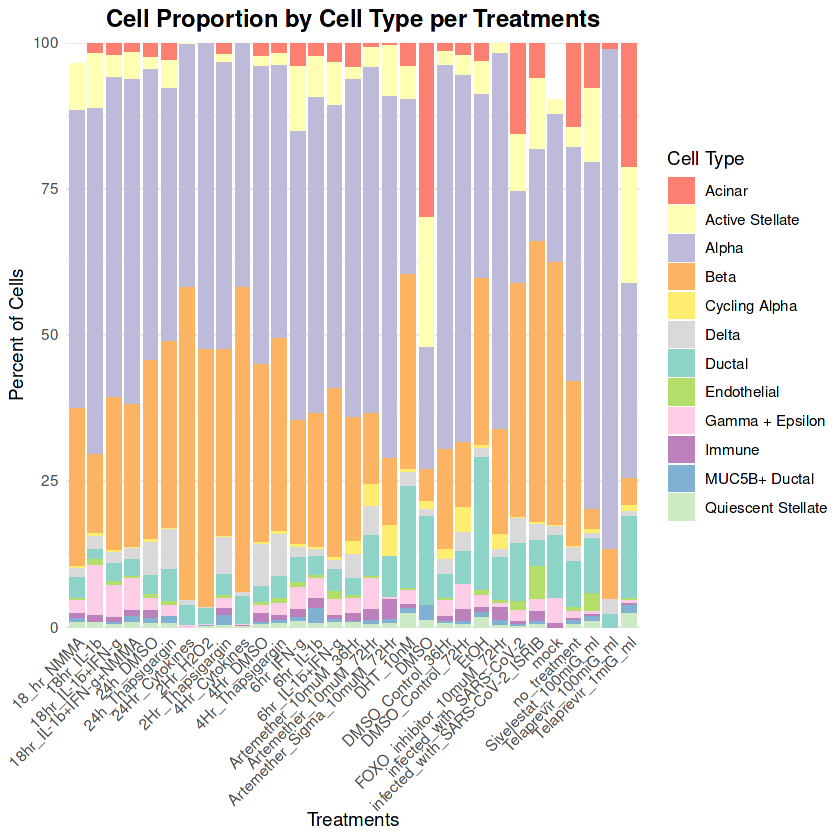

Creating: Source...
  ✓ Created: Source



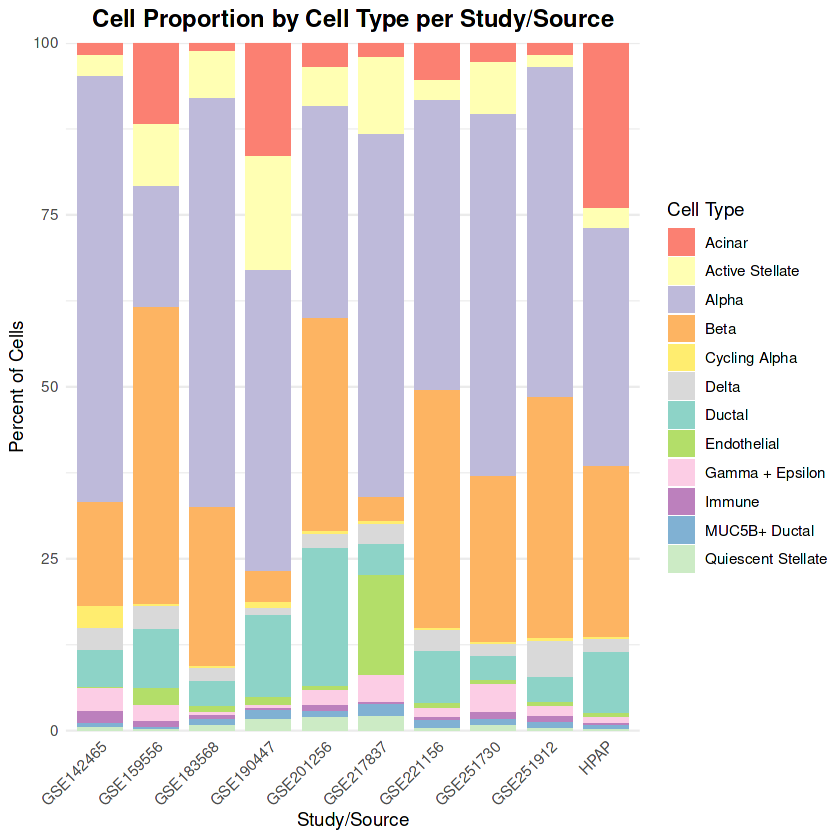

Creating: Sex...
  ✓ Created: Sex



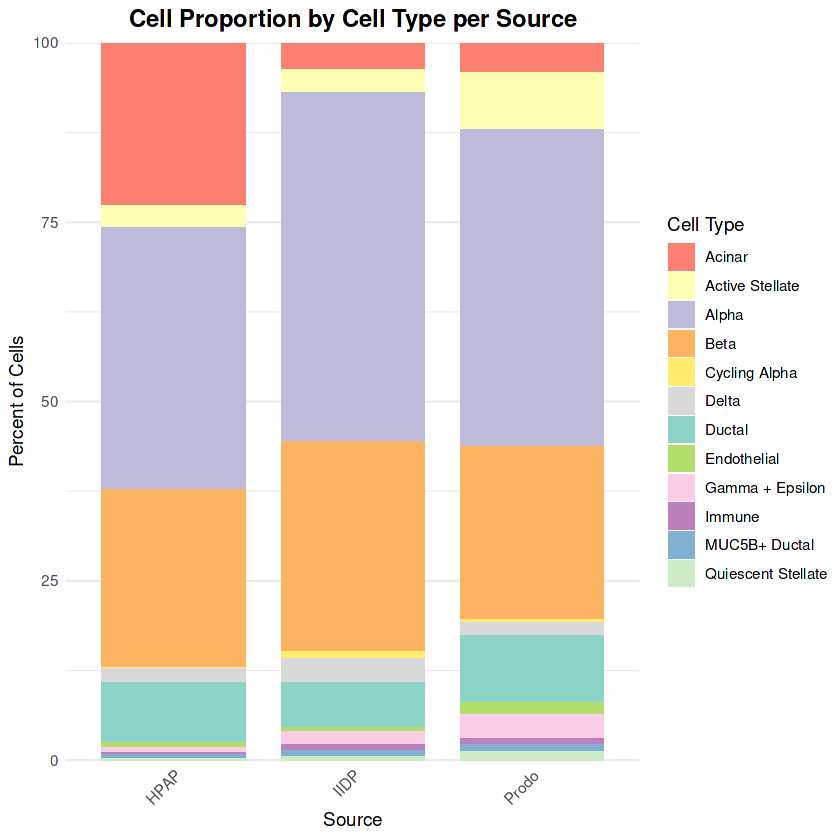

Creating: Diabetes Status...
  ✓ Created: Diabetes Status



Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`).”


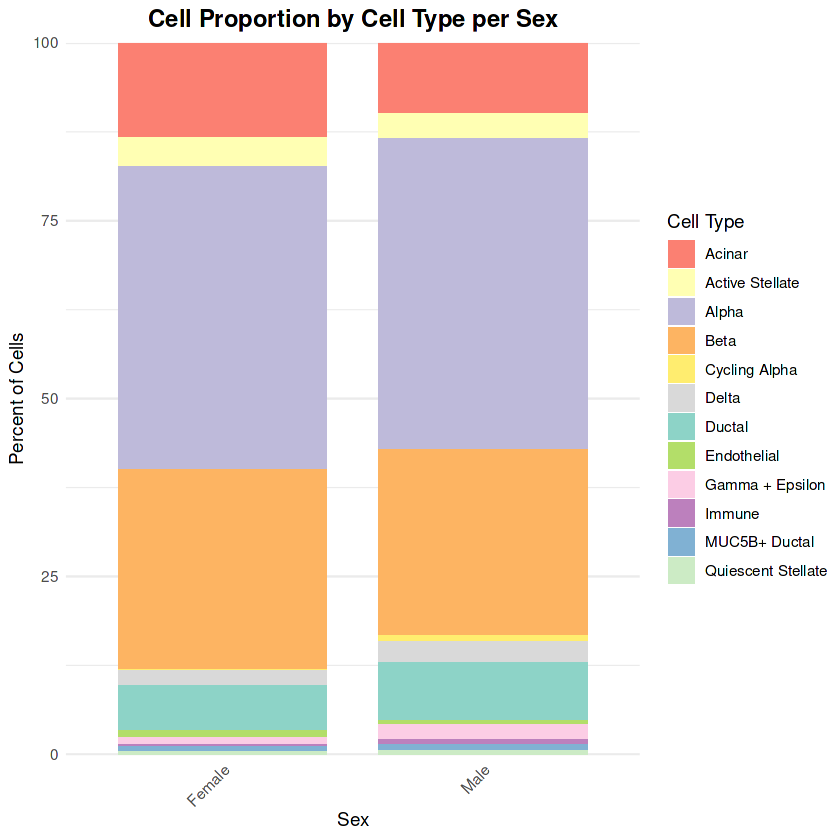

Creating: Ethnicity...
  ✓ Created: Ethnicity



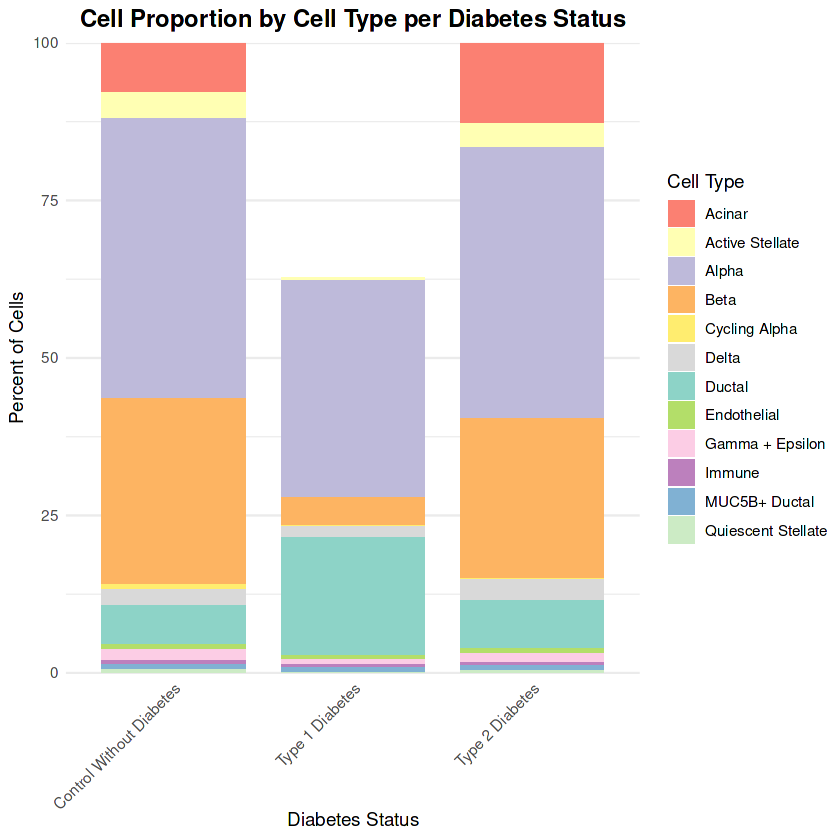

Creating: Genetic Ancestry...
Too many categories (67), limiting to top 30
  ✓ Created: Genetic Ancestry



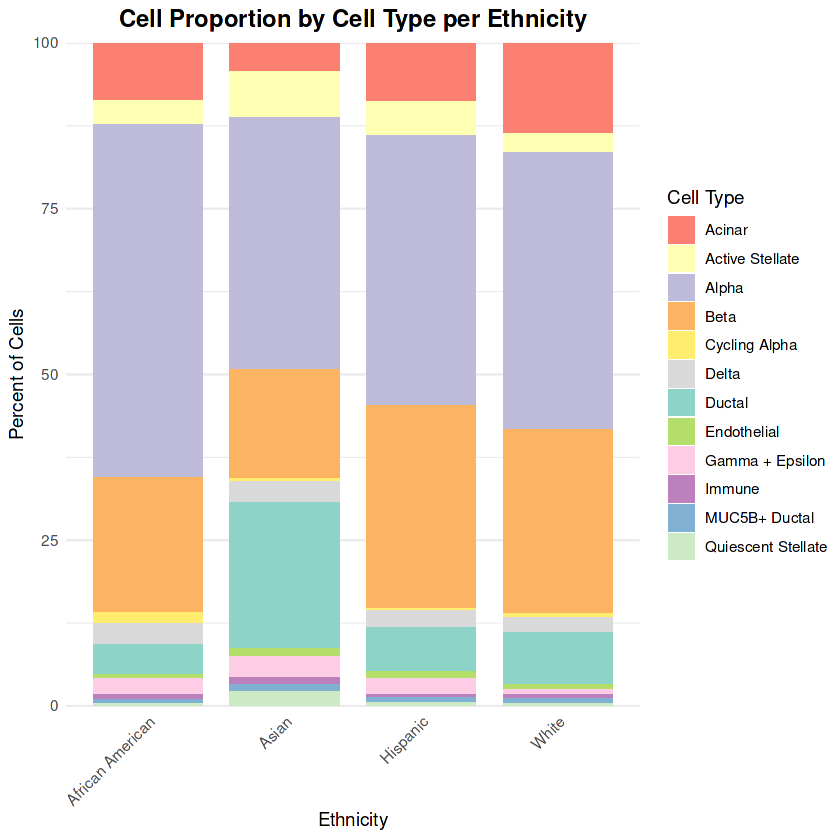

Creating: T1D Stage...
  ✓ Created: T1D Stage



Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`).”


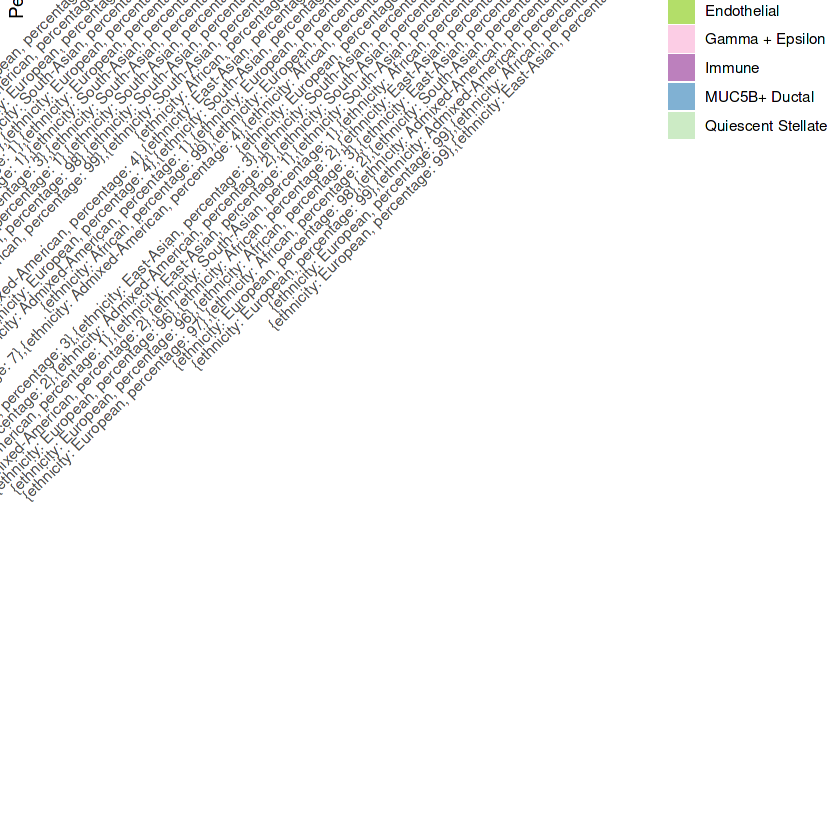

Creating: Organ Source...
  ✓ Created: Organ Source



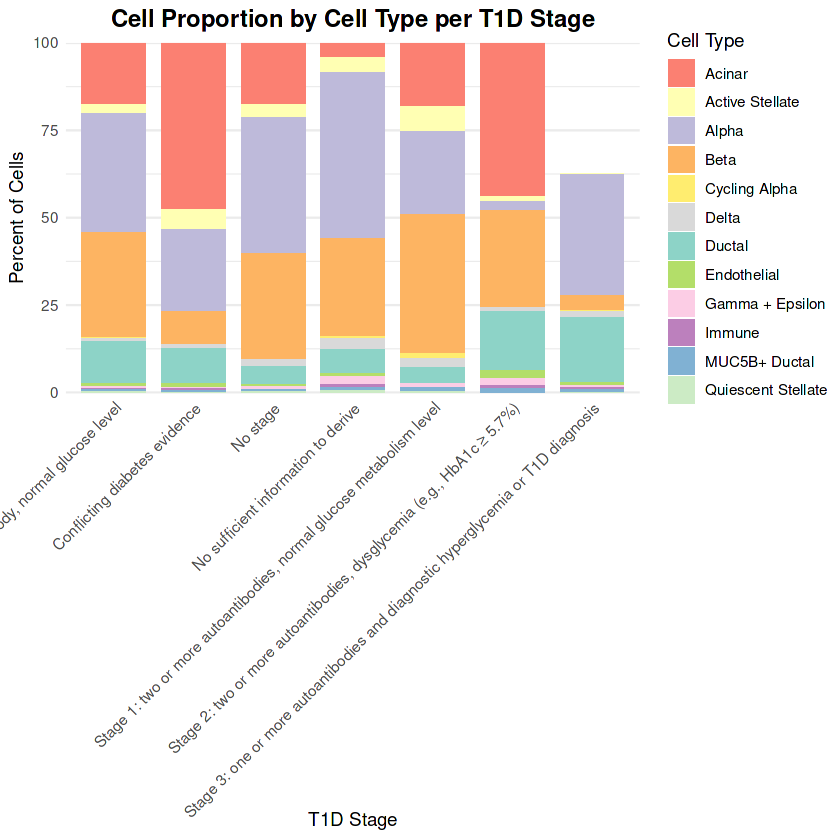

Creating: Isolation Center...
  ✓ Created: Isolation Center



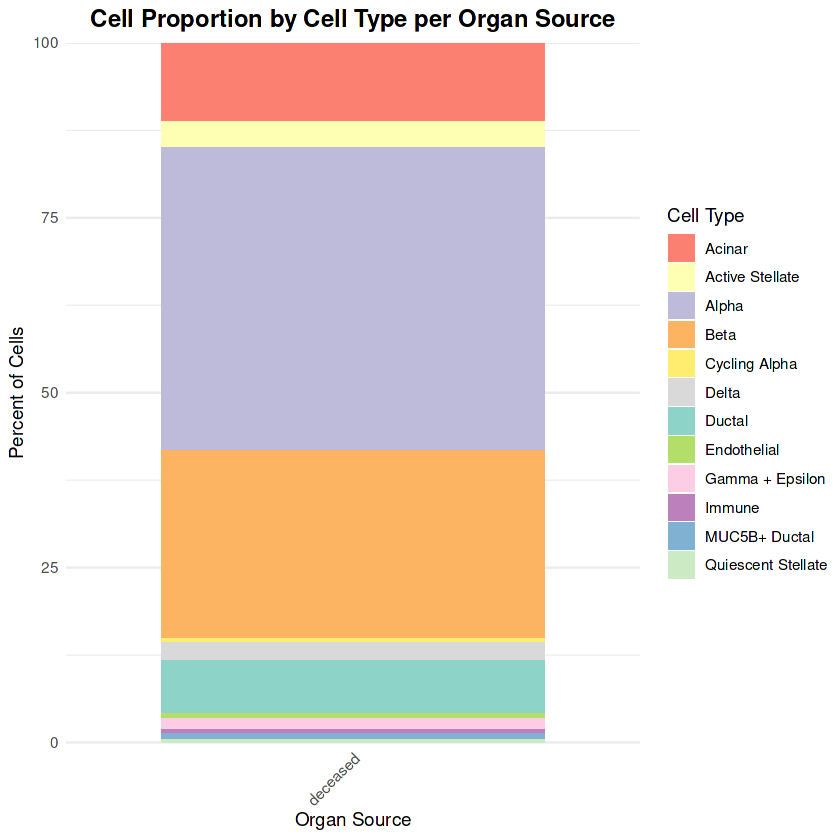

Creating: Donation Type...
  ✓ Created: Donation Type



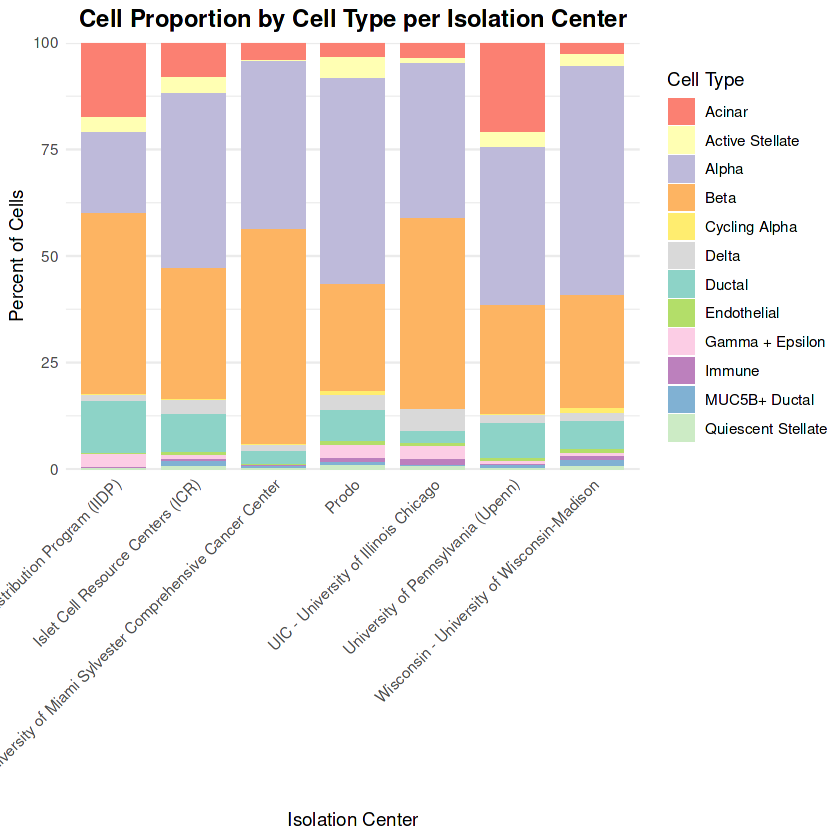

Creating: GADA Status...
  ✓ Created: GADA Status

Creating: IA2 Status...
  ✓ Created: IA2 Status

Creating: IAA Status...
  ✓ Created: IAA Status

Creating: ZNT8 Status...
  ✓ Created: ZNT8 Status


SECTION 2: Cell Proportion by Continuous Variables

Creating: Age (years)...
  ✓ Created: Age (years)



`geom_smooth()` using formula = 'y ~ x'


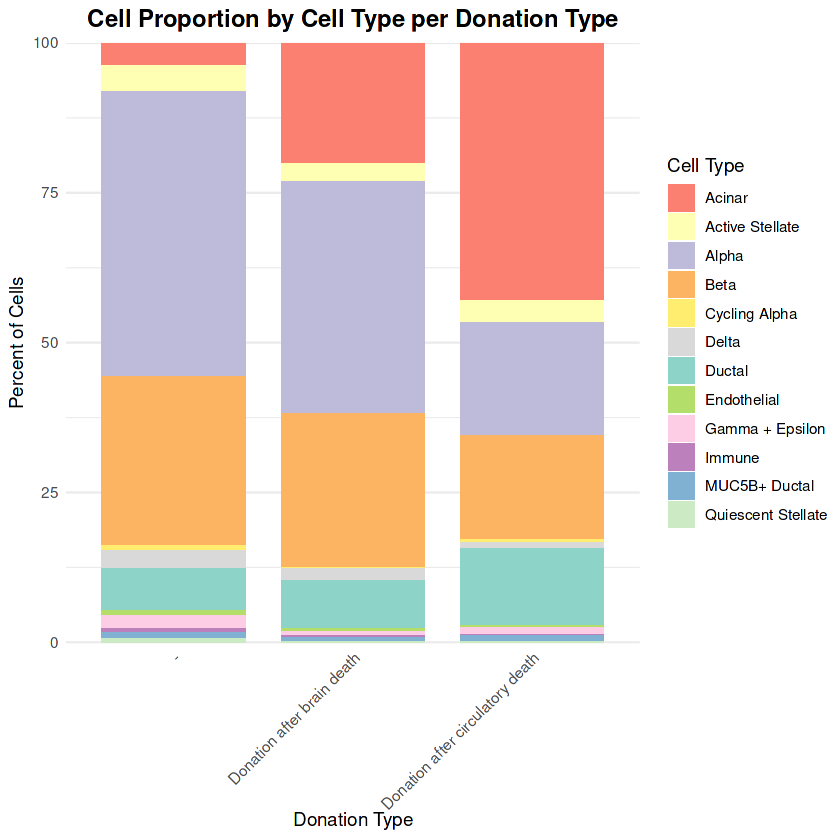

Creating: BMI...
  ✓ Created: BMI



`geom_smooth()` using formula = 'y ~ x'


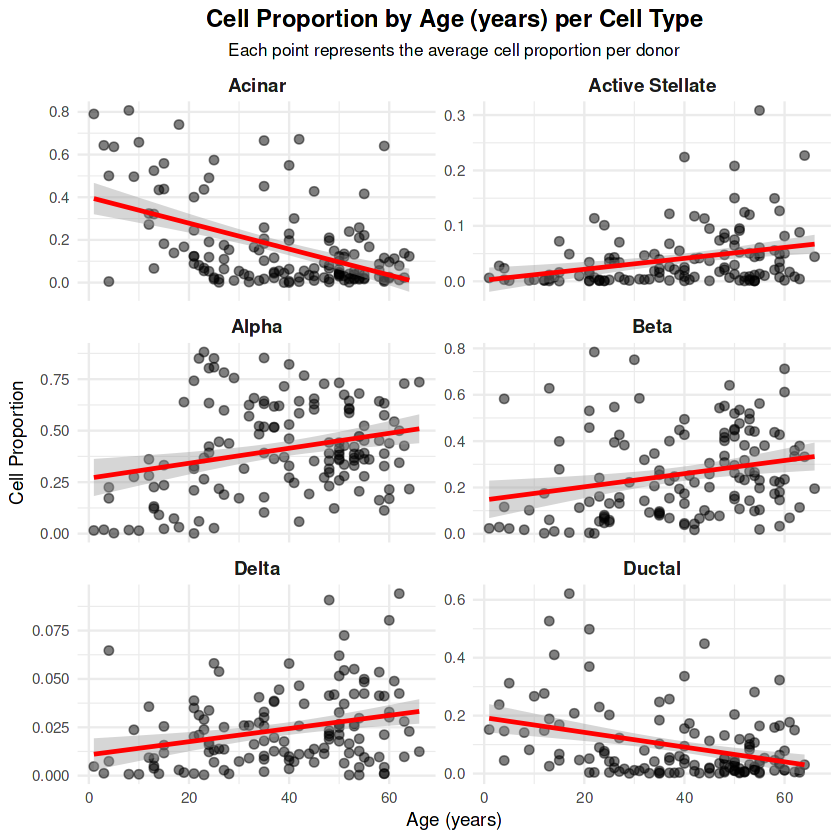

Creating: HbA1c (%)...
  ✓ Created: HbA1c (%)



`geom_smooth()` using formula = 'y ~ x'


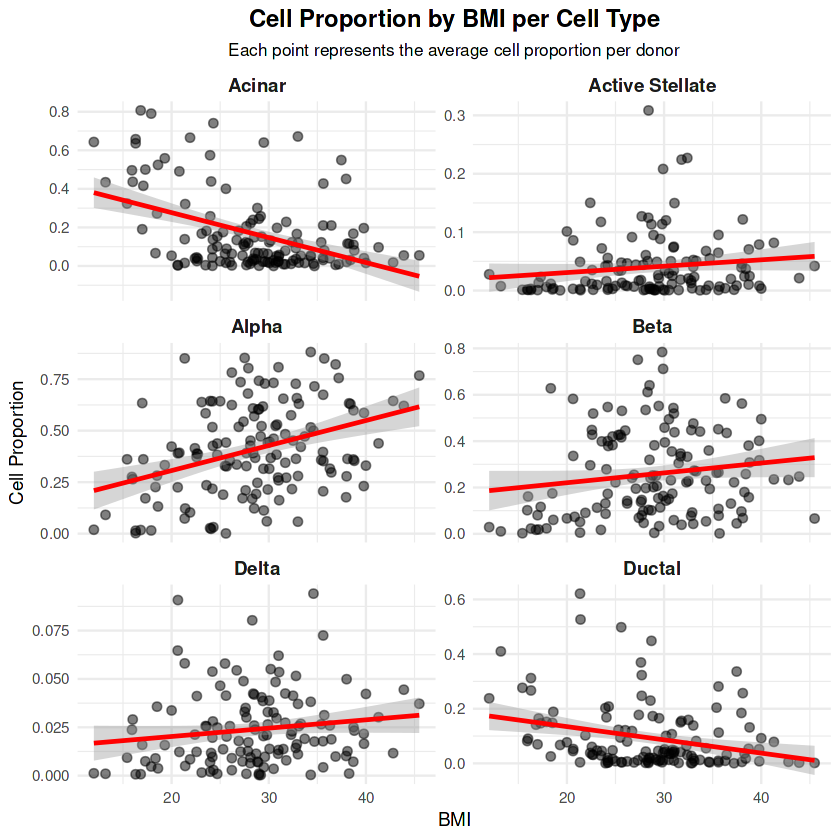

Creating: C-peptide (ng/ml)...
  ✓ Created: C-peptide (ng/ml)



`geom_smooth()` using formula = 'y ~ x'


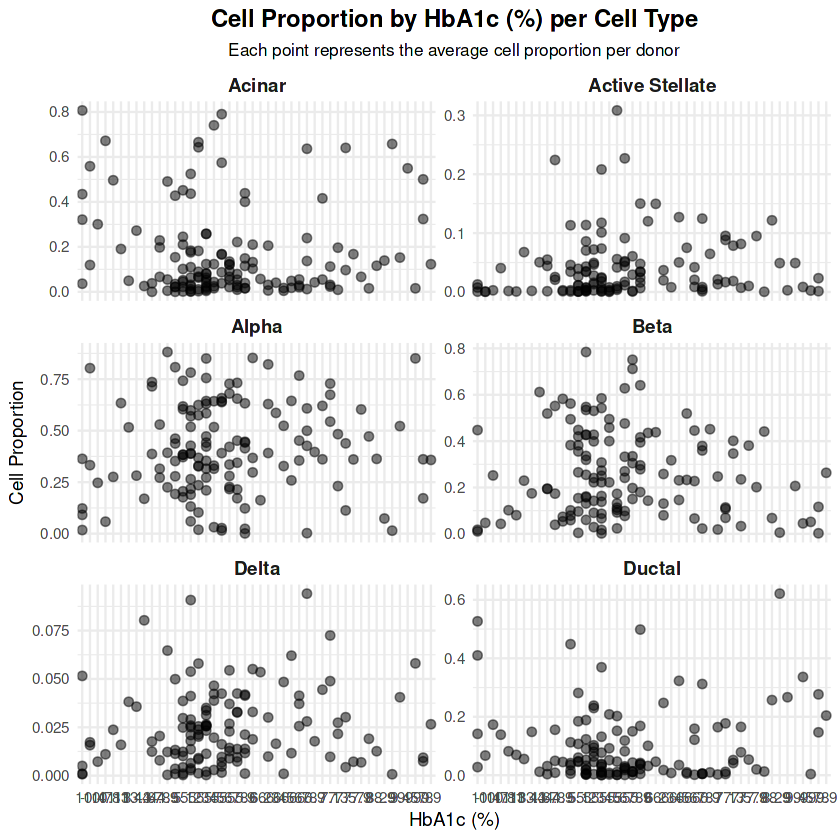

Creating: Diabetes Duration (years)...
  ✓ Created: Diabetes Duration (years)



`geom_smooth()` using formula = 'y ~ x'


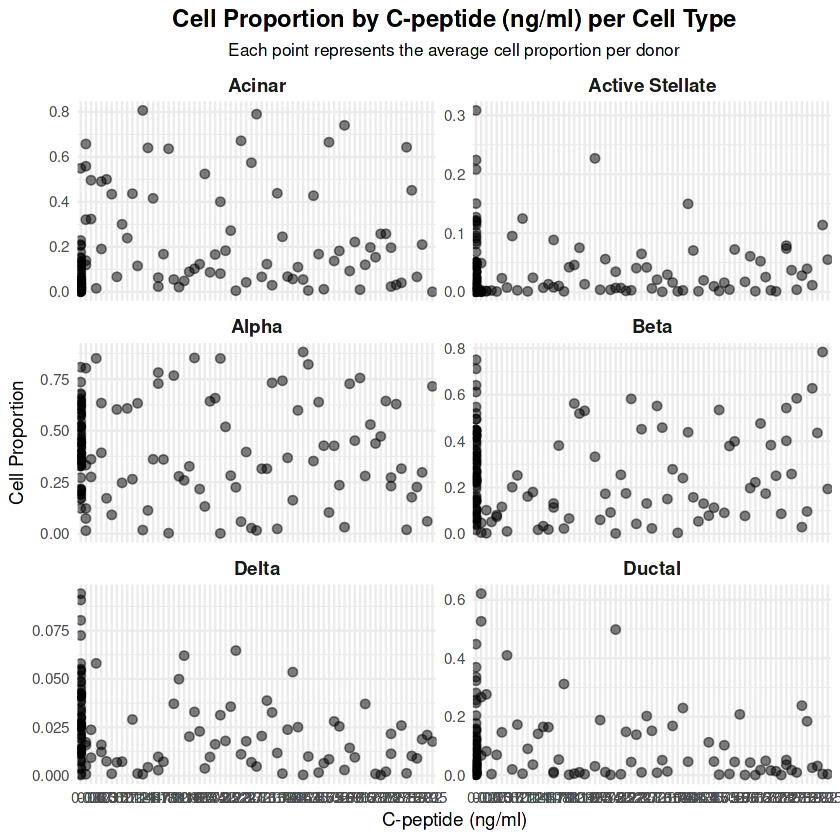

Creating: Cold Ischemia Time (hours)...
  ✓ Created: Cold Ischemia Time (hours)



`geom_smooth()` using formula = 'y ~ x'


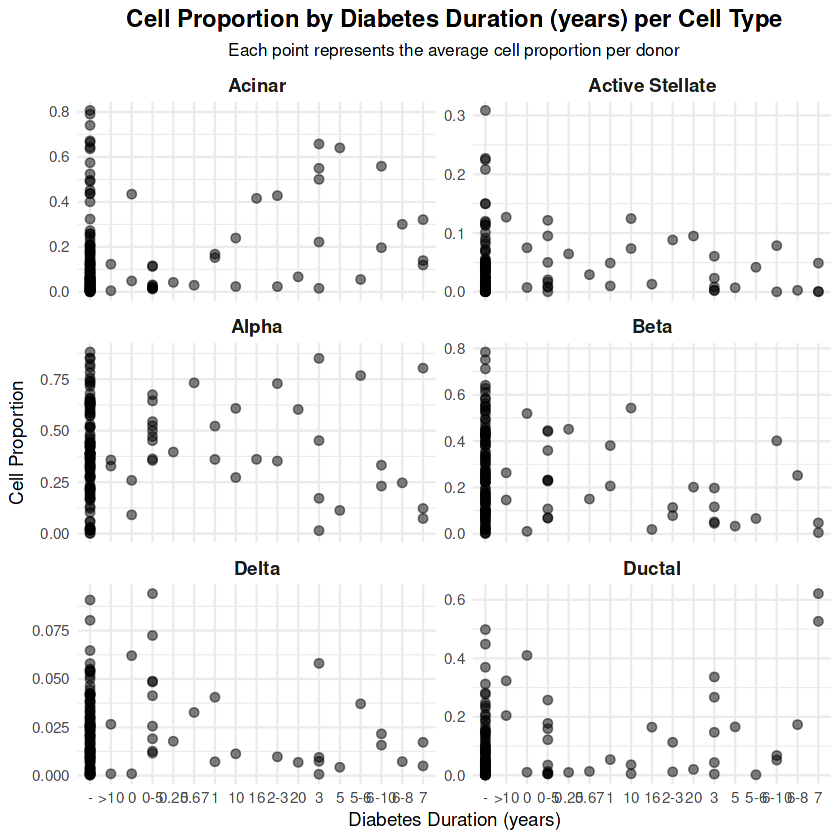

Creating: Hospital Stay (hours)...
  ✓ Created: Hospital Stay (hours)



`geom_smooth()` using formula = 'y ~ x'


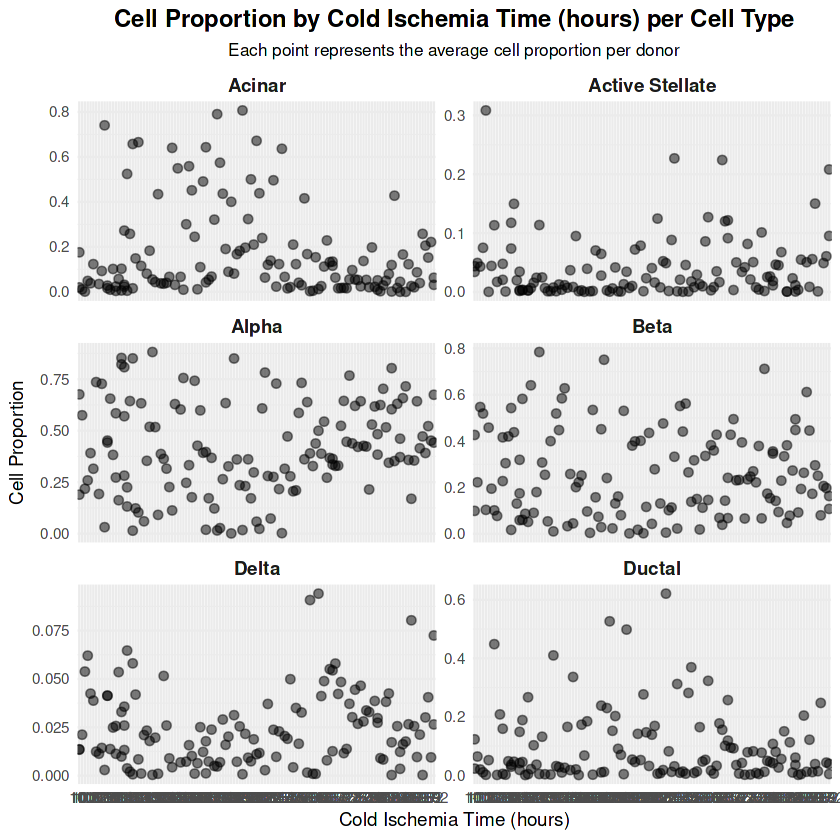

Creating: Islet Yield (IEQ)...
  ✓ Created: Islet Yield (IEQ)



`geom_smooth()` using formula = 'y ~ x'


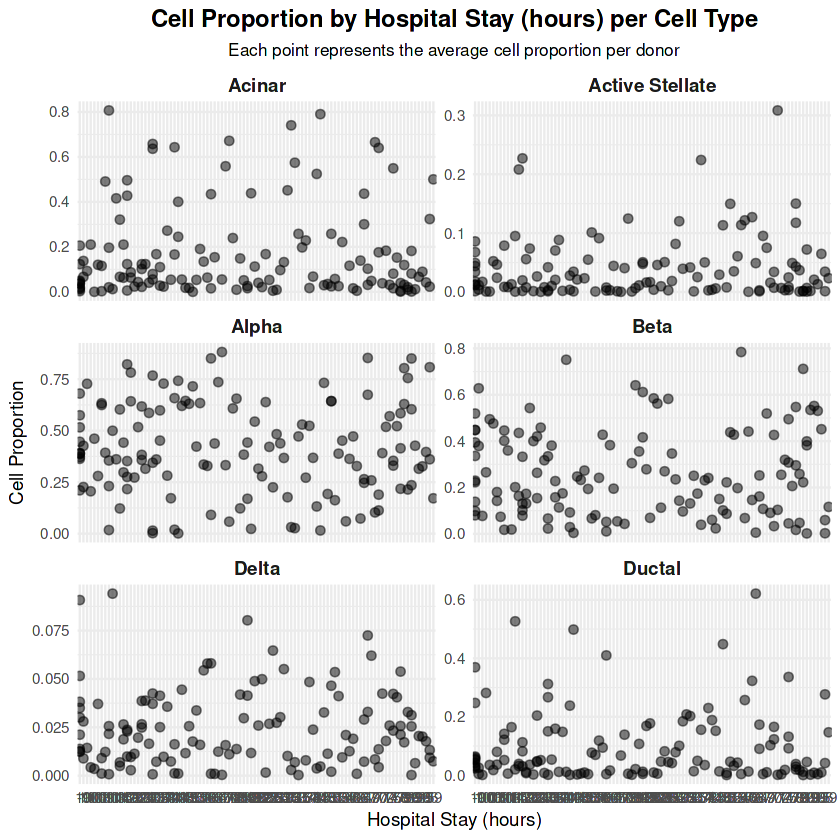

Creating: IEQ/Pancreas Weight...
  ✓ Created: IEQ/Pancreas Weight



`geom_smooth()` using formula = 'y ~ x'


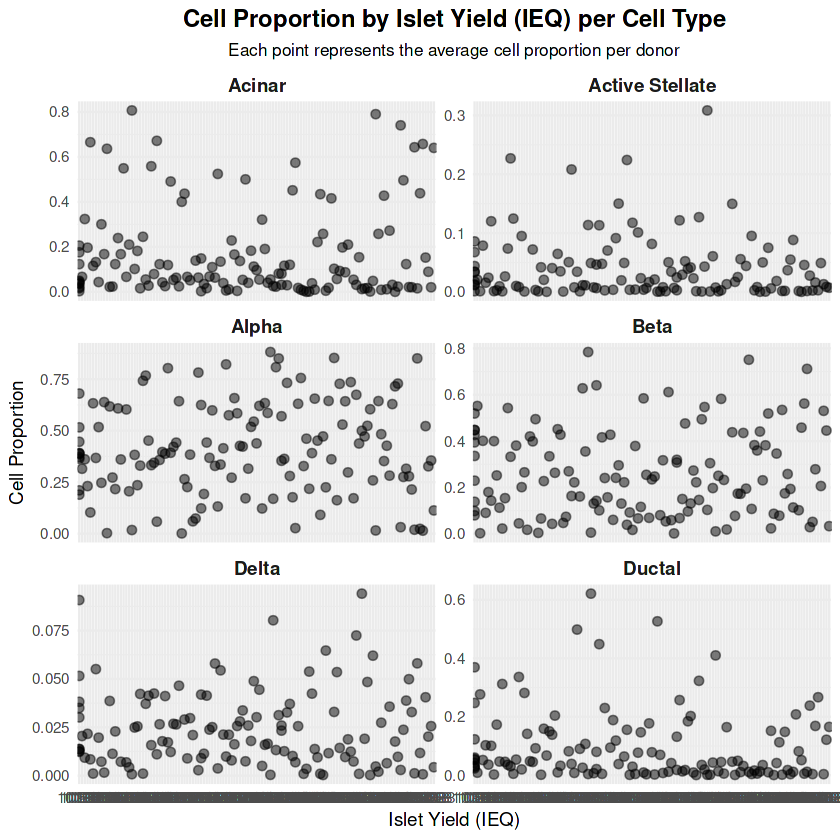

Creating: Prep Viability (%)...
  ✓ Created: Prep Viability (%)



`geom_smooth()` using formula = 'y ~ x'


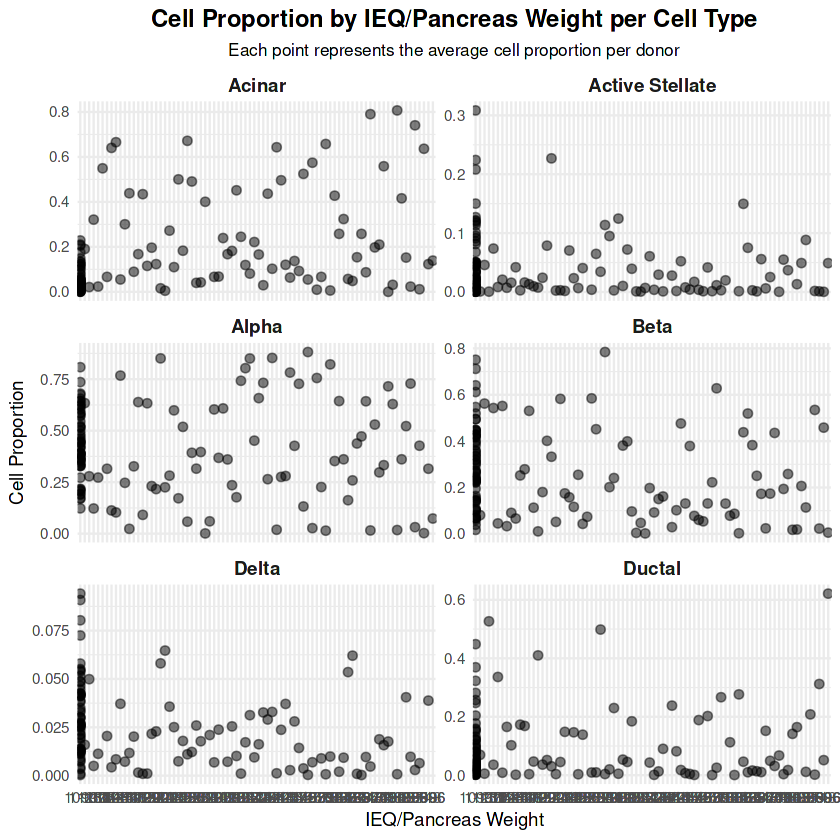

Creating: Purity (%)...
  ✓ Created: Purity (%)



`geom_smooth()` using formula = 'y ~ x'


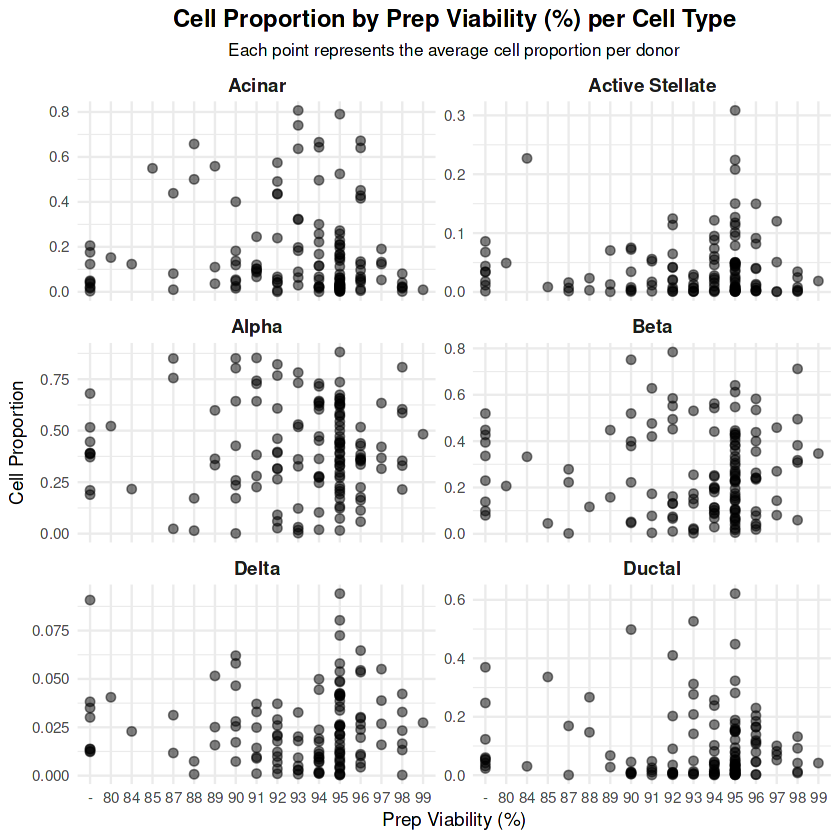

Creating: GADA Value (unit/ml)...
  ✓ Created: GADA Value (unit/ml)



`geom_smooth()` using formula = 'y ~ x'


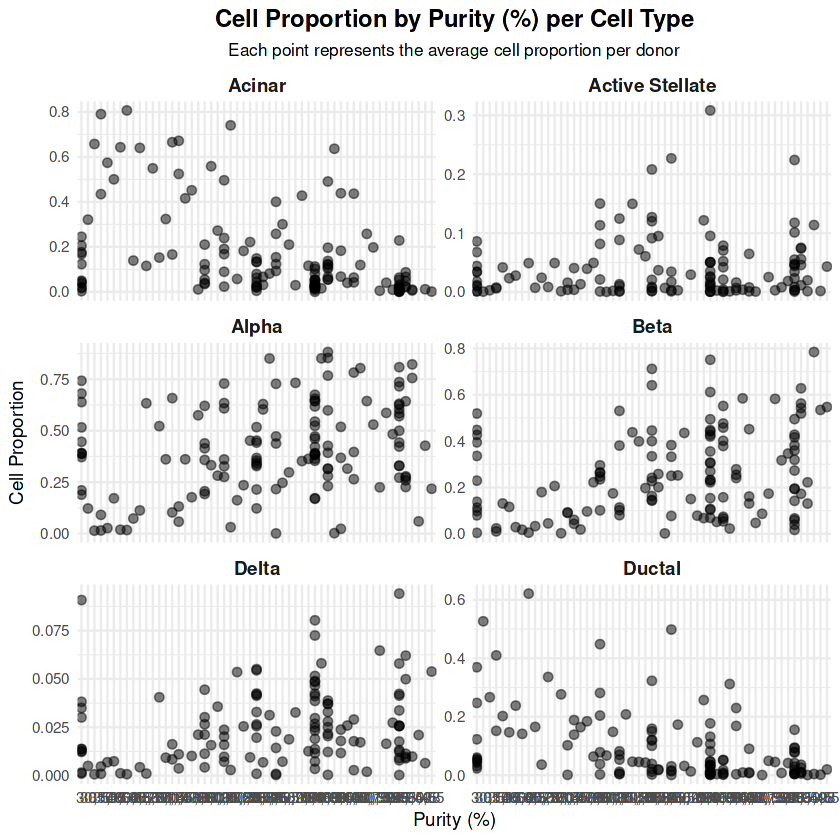

Creating: IA2 Value (unit/ml)...
  ✓ Created: IA2 Value (unit/ml)



`geom_smooth()` using formula = 'y ~ x'


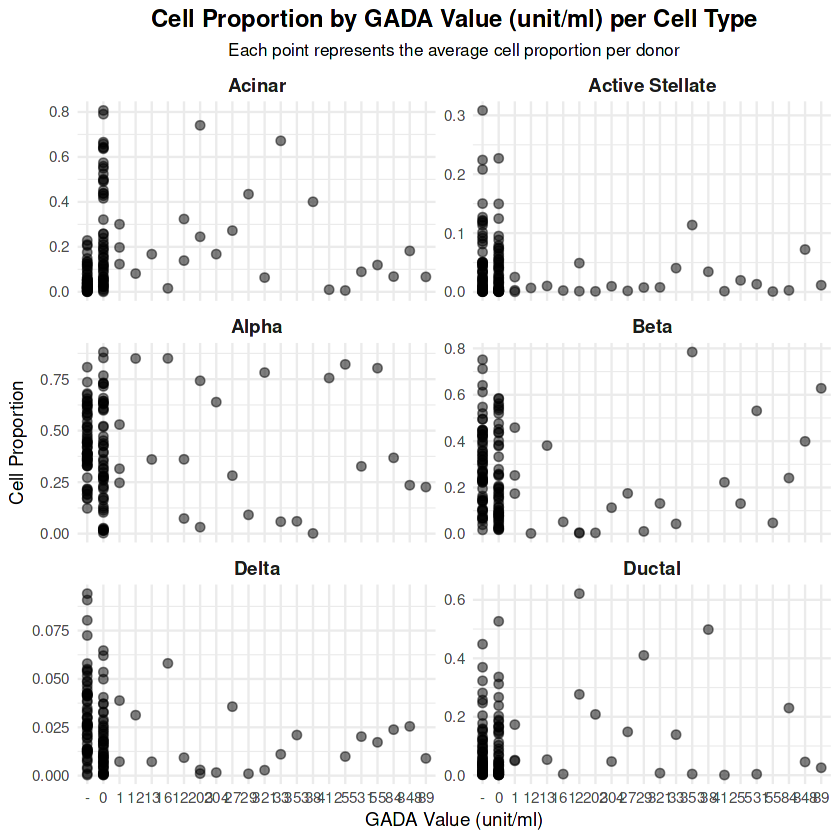

Creating: IAA Value (unit/ml)...
  ✓ Created: IAA Value (unit/ml)



`geom_smooth()` using formula = 'y ~ x'


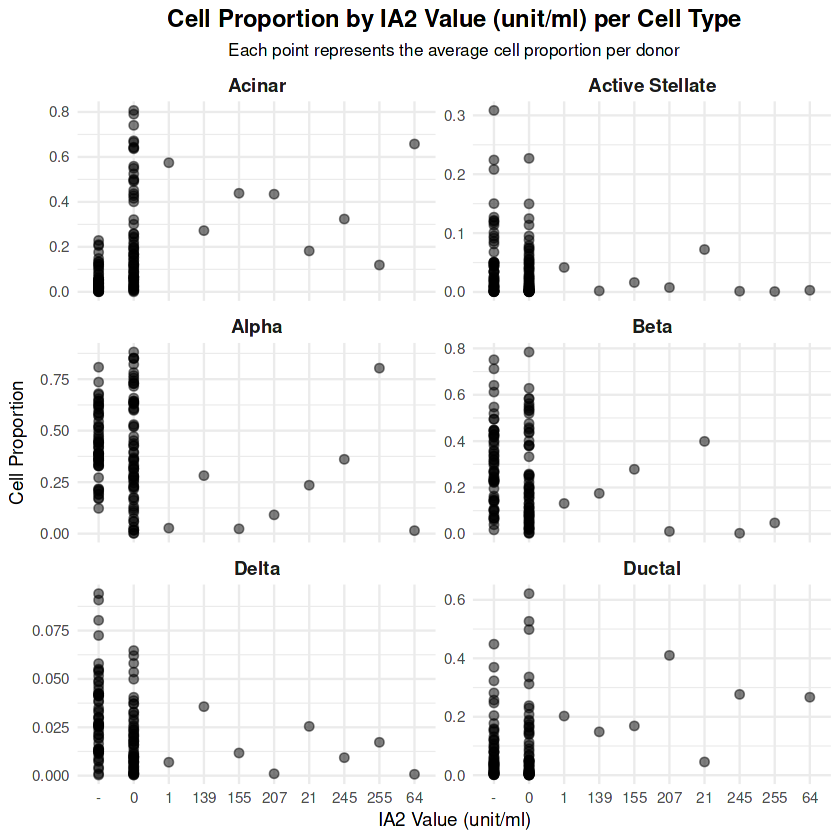

Creating: ZNT8 Value (unit/ml)...
  ✓ Created: ZNT8 Value (unit/ml)



`geom_smooth()` using formula = 'y ~ x'


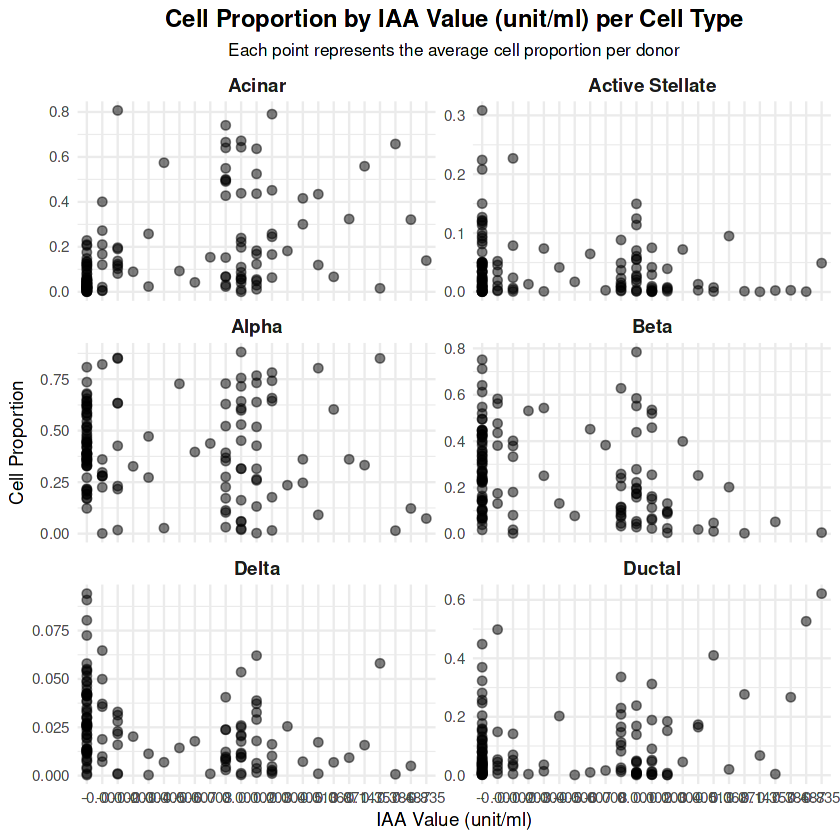


SECTION 3: Gene Expression by Traits


SECTION 4: Summary and Demographic Plots

Creating cell count summary...


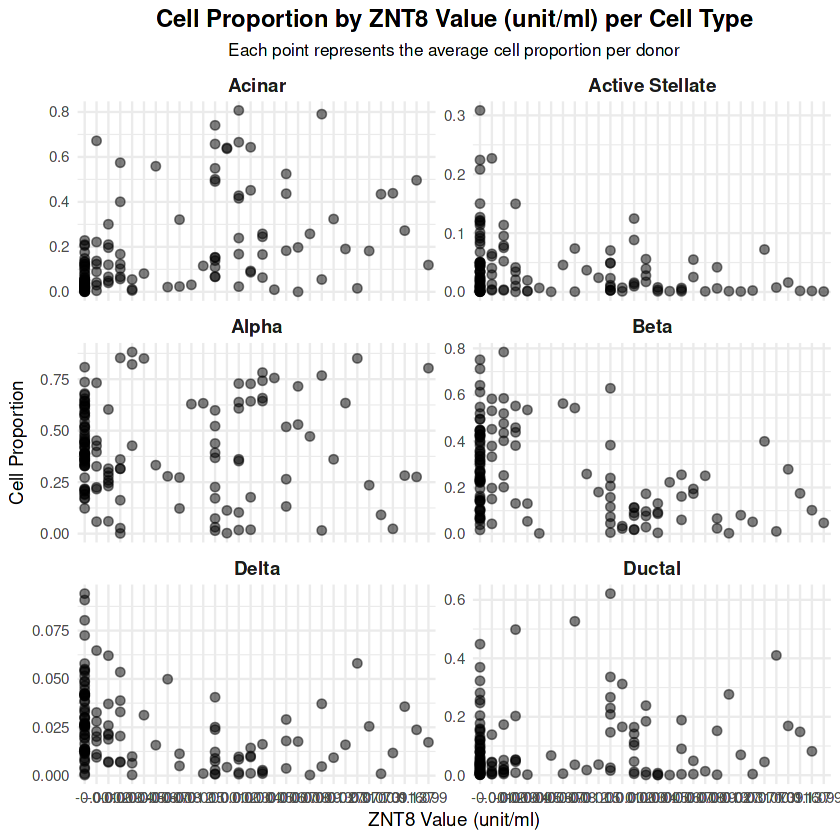

✓ Created

Creating donor demographic plots...


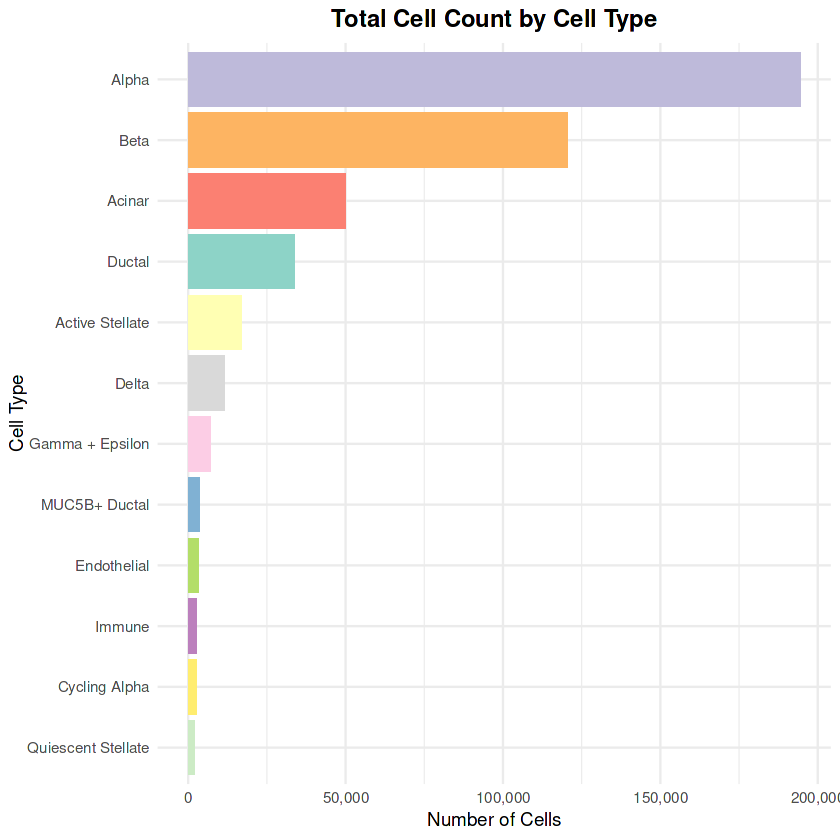

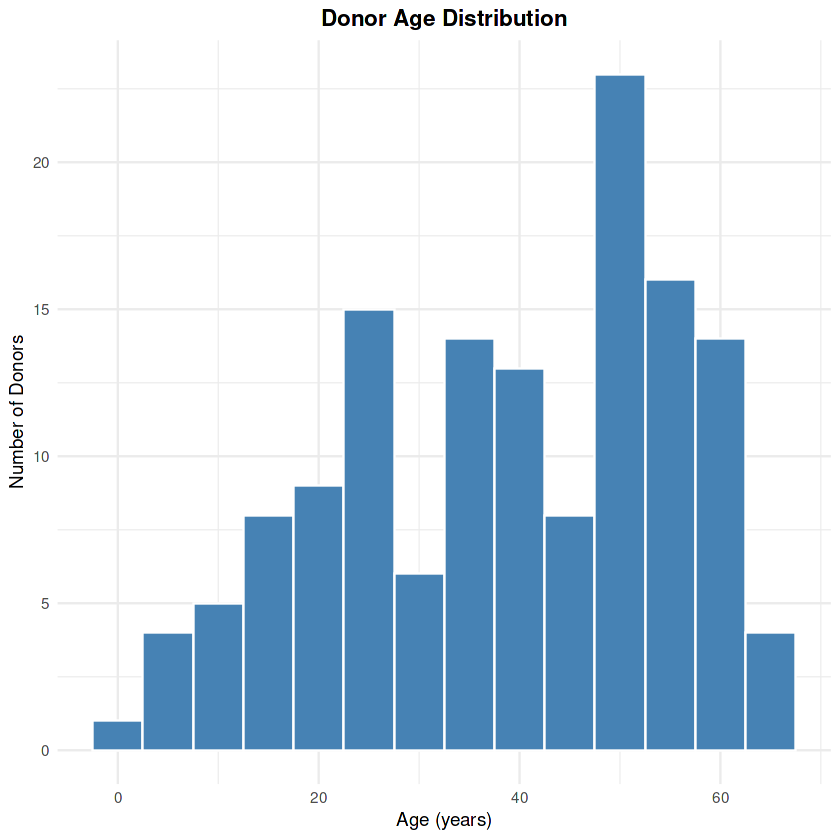

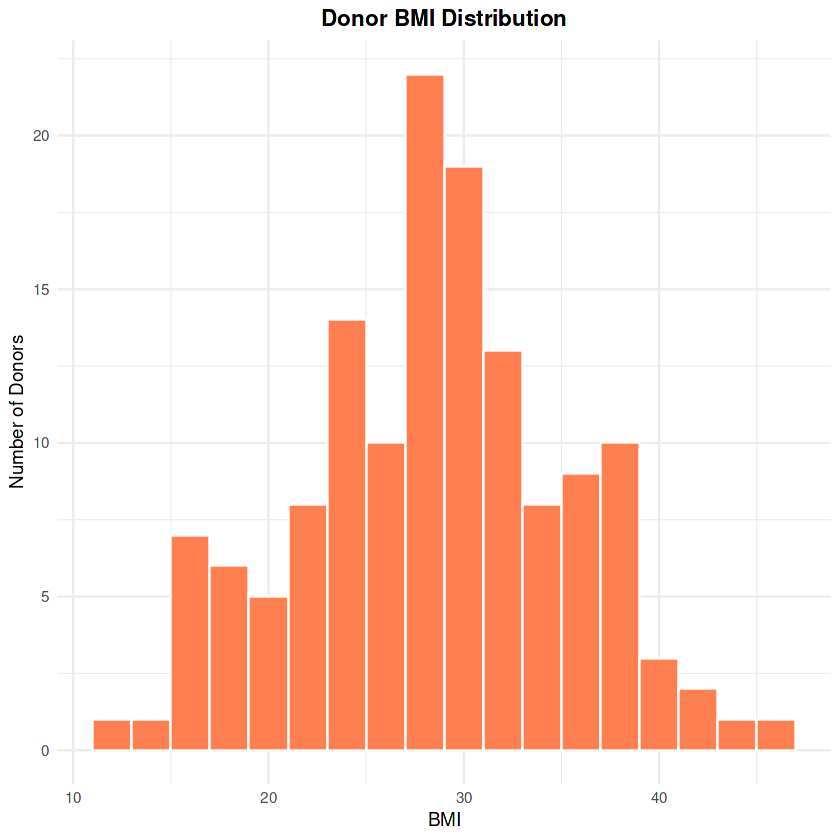

✓ Created


                ✓ ALL PLOTS COMPLETE ✓

Created:
  • Cell proportion plots (categorical variables)
  • Cell proportion plots (continuous variables)
  • Gene expression plots for key genes
  • Summary/demographic plots



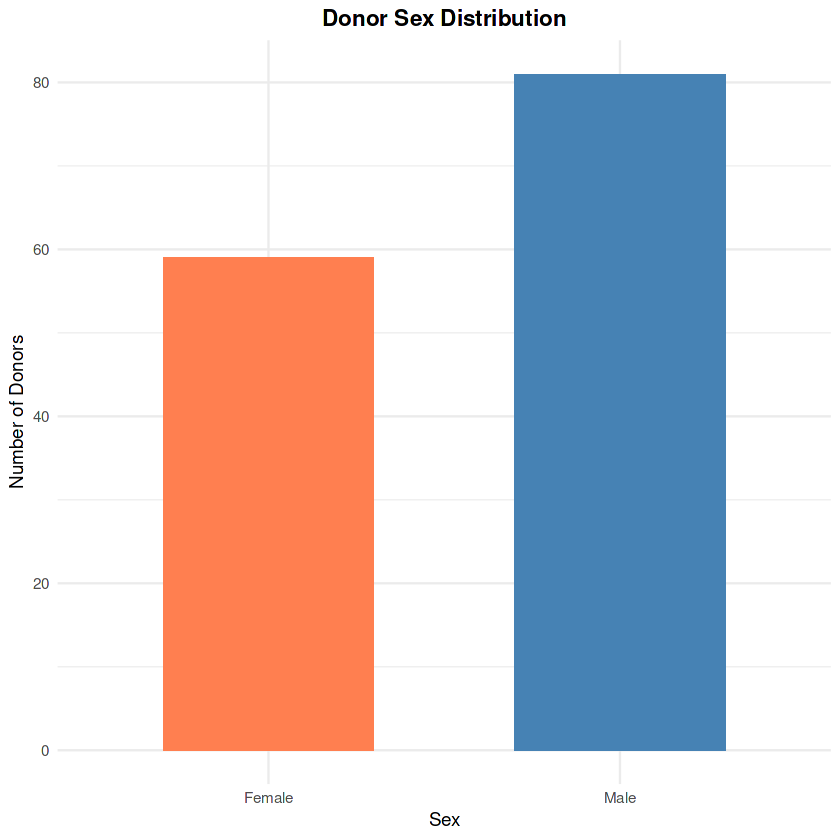

In [17]:
# ============================================================================
# COMPREHENSIVE PLOTTING SUITE FOR PANKBASE DATA
# ============================================================================

library(Seurat)
library(ggplot2)
library(dplyr)
library(tidyr)
library(RColorBrewer)
library(gridExtra)

cat("=== CREATING COMPREHENSIVE PLOTS ===\n\n")

# Set up color palette
cell_types <- unique(seurat_obj_sbc@meta.data$Cell_Type)
n_types <- length(cell_types)
color_palette <- colorRampPalette(brewer.pal(12, "Set3"))(n_types)
names(color_palette) <- cell_types

# ============================================================================
# SECTION 1: CELL PROPORTION PLOTS (CATEGORICAL VARIABLES)
# ============================================================================

cat("SECTION 1: Cell Proportion by Categorical Variables\n\n")

# Function for categorical cell proportion plots
plot_cell_prop_categorical <- function(var_name, var_label, max_categories = 30) {
  
  cat(sprintf("Creating: %s...\n", var_label))
  
  if (!var_name %in% colnames(seurat_obj_sbc@meta.data)) {
    cat(sprintf("   Column %s not found\n", var_name))
    return(NULL)
  }
  
  # Calculate proportions
  prop_data <- seurat_obj_sbc@meta.data %>%
    filter(!is.na(!!sym(var_name)) & !!sym(var_name) != "") %>%
    group_by(!!sym(var_name), Cell_Type) %>%
    summarise(count = n(), .groups = 'drop') %>%
    group_by(!!sym(var_name)) %>%
    mutate(proportion = count / sum(count) * 100)
  
  # Limit categories if too many
  n_categories <- length(unique(prop_data[[var_name]]))
  if (n_categories > max_categories) {
    cat(sprintf("Too many categories (%d), limiting to top %d\n", n_categories, max_categories))
    top_categories <- prop_data %>%
      group_by(!!sym(var_name)) %>%
      summarise(total = sum(count)) %>%
      arrange(desc(total)) %>%
      head(max_categories) %>%
      pull(!!sym(var_name))
    
    prop_data <- prop_data %>% filter(!!sym(var_name) %in% top_categories)
  }
  
  p <- ggplot(prop_data, aes(x = !!sym(var_name), y = proportion, fill = Cell_Type)) +
    geom_bar(stat = "identity", width = 0.8) +
    scale_y_continuous(expand = c(0, 0), limits = c(0, 100)) +
    labs(title = sprintf("Cell Proportion by Cell Type per %s", var_label),
         x = var_label,
         y = "Percent of Cells",
         fill = "Cell Type") +
    theme_minimal() +
    theme(
      axis.text.x = element_text(angle = 45, hjust = 1, size = 9),
      plot.title = element_text(hjust = 0.5, face = "bold", size = 14),
      legend.position = "right",
      panel.grid.major.x = element_blank()
    ) +
    scale_fill_manual(values = color_palette)
  
  #print(p)
  cat(sprintf("  ✓ Created: %s\n\n", var_label))
  
  return(p)
}

# Create categorical plots
plot_cell_prop_categorical("treatments", "Treatments", max_categories = 40)
plot_cell_prop_categorical("study", "Study/Source")
plot_cell_prop_categorical("source", "Source")
plot_cell_prop_categorical("sex", "Sex")
plot_cell_prop_categorical("description_of_diabetes_status", "Diabetes Status")
plot_cell_prop_categorical("reported_ethnicity", "Ethnicity")
plot_cell_prop_categorical("predicted_genetic_ancestry", "Genetic Ancestry")
plot_cell_prop_categorical("t1d_stage", "T1D Stage")
plot_cell_prop_categorical("organ_source", "Organ Source")
plot_cell_prop_categorical("isolation_center", "Isolation Center", max_categories = 20)
plot_cell_prop_categorical("donation_type", "Donation Type")

# Autoantibody status plots
for (aab in c("aab_gada_positive", "aab_ia2_positive", "aab_iaa_positive", "aab_znt8_positive")) {
  aab_name <- gsub("aab_(.+)_positive", "\\1", aab)
  plot_cell_prop_categorical(aab, sprintf("%s Status", toupper(aab_name)))
}

# ============================================================================
# SECTION 2: CELL PROPORTION BY CONTINUOUS VARIABLES (SCATTER PLOTS)
# ============================================================================

cat("\nSECTION 2: Cell Proportion by Continuous Variables\n\n")

# Function for continuous variable plots
plot_cell_prop_continuous <- function(var_name, var_label, top_n_celltypes = 6) {
  
  cat(sprintf("Creating: %s...\n", var_label))
  
  if (!var_name %in% colnames(seurat_obj_sbc@meta.data)) {
    cat(sprintf("  Column %s not found\n", var_name))
    return(NULL)
  }
  
  # Calculate average cell proportion per donor
  prop_data <- seurat_obj_sbc@meta.data %>%
    filter(!is.na(!!sym(var_name)) & !is.na(Cell_Type)) %>%
    group_by(donor_accession, !!sym(var_name), Cell_Type) %>%
    summarise(count = n(), .groups = 'drop') %>%
    group_by(donor_accession, !!sym(var_name)) %>%
    mutate(proportion = count / sum(count))
  
  if (nrow(prop_data) == 0) {
    cat("   No data after filtering\n")
    return(NULL)
  }
  
  # Plot top cell types
  top_types <- head(names(sort(table(seurat_obj_sbc@meta.data$Cell_Type), decreasing = TRUE)), 
                    top_n_celltypes)
  
  p <- ggplot(prop_data %>% filter(Cell_Type %in% top_types), 
              aes(x = !!sym(var_name), y = proportion)) +
    geom_point(alpha = 0.5, size = 2) +
    geom_smooth(method = "lm", se = TRUE, color = "red", linewidth = 1) +
    facet_wrap(~ Cell_Type, ncol = 2, scales = "free_y") +
    labs(title = sprintf("Cell Proportion by %s per Cell Type", var_label),
         subtitle = "Each point represents the average cell proportion per donor",
         x = var_label,
         y = "Cell Proportion") +
    theme_minimal() +
    theme(
      plot.title = element_text(hjust = 0.5, face = "bold", size = 14),
      plot.subtitle = element_text(hjust = 0.5, size = 10),
      strip.text = element_text(face = "bold", size = 11)
    )
  
  #print(p)
  cat(sprintf("  ✓ Created: %s\n\n", var_label))
  
  return(p)
}

# Create continuous variable plots
plot_cell_prop_continuous("age_.years.", "Age (years)")
plot_cell_prop_continuous("bmi", "BMI")
plot_cell_prop_continuous("hba1c_.percentage.", "HbA1c (%)")
plot_cell_prop_continuous("c_peptide_.ng.ml.", "C-peptide (ng/ml)")
plot_cell_prop_continuous("diabetes_duration_.years.", "Diabetes Duration (years)")
plot_cell_prop_continuous("biosample_cold_ischaemia_time_.hours.", "Cold Ischemia Time (hours)")
plot_cell_prop_continuous("hospital_stay_.hours.", "Hospital Stay (hours)")
plot_cell_prop_continuous("islet_yield_ieq", "Islet Yield (IEQ)")
plot_cell_prop_continuous("ieq_pancreas_weight_.grams.", "IEQ/Pancreas Weight")
plot_cell_prop_continuous("prep_viability_.percentage.", "Prep Viability (%)")
plot_cell_prop_continuous("purity_.percentage.", "Purity (%)")

# Autoantibody values
plot_cell_prop_continuous("aab_gada_value_.unit.ml.", "GADA Value (unit/ml)")
plot_cell_prop_continuous("aab_ia2_value_.unit.ml.", "IA2 Value (unit/ml)")
plot_cell_prop_continuous("aab_iaa_value_.unit.ml.", "IAA Value (unit/ml)")
plot_cell_prop_continuous("aab_znt8_value_.unit.ml.", "ZNT8 Value (unit/ml)")

# ============================================================================
# SECTION 3: GENE EXPRESSION PLOTS
# ============================================================================

cat("\nSECTION 3: Gene Expression by Traits\n\n")

# Function for gene expression plots
plot_gene_expression <- function(gene_name, var_name, var_label, top_n_celltypes = 6) {
  
  cat(sprintf("Plotting %s by %s...\n", gene_name, var_label))
  
  # Check gene exists
  if (!gene_name %in% rownames(seurat_obj_sbc)) {
    cat(sprintf("  ✗ Gene %s not found\n", gene_name))
    return(NULL)
  }
  
  # Check variable exists
  if (!var_name %in% colnames(seurat_obj_sbc@meta.data)) {
    cat(sprintf("  ✗ Column %s not found\n", var_name))
    return(NULL)
  }
  
  # Get expression data
  expr_data <- FetchData(seurat_obj_sbc, 
                         vars = c(gene_name, "Cell_Type", "donor_accession", var_name))
  colnames(expr_data) <- c("expression", "Cell_Type", "donor_accession", "trait")
  
  # Calculate average expression per donor
  avg_expr <- expr_data %>%
    filter(!is.na(trait) & !is.na(Cell_Type)) %>%
    group_by(donor_accession, trait, Cell_Type) %>%
    summarise(avg_expression = mean(expression, na.rm = TRUE), .groups = 'drop')
  
  if (nrow(avg_expr) == 0) {
    cat("  ✗ No data after filtering\n")
    return(NULL)
  }
  
  # Plot top cell types
  top_types <- head(names(sort(table(seurat_obj_sbc@meta.data$Cell_Type), decreasing = TRUE)), 
                    top_n_celltypes)
  
  p <- ggplot(avg_expr %>% filter(Cell_Type %in% top_types), 
              aes(x = trait, y = avg_expression)) +
    geom_point(alpha = 0.5, size = 2) +
    geom_smooth(method = "lm", se = TRUE, color = "red", linewidth = 1) +
    facet_wrap(~ Cell_Type, ncol = 2, scales = "free_y") +
    labs(title = sprintf("%s Expression by %s per Cell Type", gene_name, var_label),
         subtitle = "Each point represents the average gene expression per donor",
         x = var_label,
         y = "Log-Norm. Expression") +
    theme_minimal() +
    theme(
      plot.title = element_text(hjust = 0.5, face = "bold", size = 14),
      plot.subtitle = element_text(hjust = 0.5, size = 10),
      strip.text = element_text(face = "bold", size = 11)
    )
  
  #print(p)
  cat(sprintf("  ✓ Created: %s by %s\n\n", gene_name, var_label))
  
  return(p)
}

# Key genes to plot
key_genes <- c(
  # Hormones
  "INS", "GCG", "SST", "PPY", "GHRL",
  
  # Beta cell markers
  "PDX1", "NKX6-1", "MAFA", "MAFB", "SLC2A2", "IAPP",
  
  # Immune markers
  "PTPRC", "CD3E", "CD68",
  
  # Stress markers
  "DDIT3", "ATF4", "XBP1", "HSP90AA1"
)

# Key traits
key_traits <- list(
  "age_.years." = "Age (years)",
  "bmi" = "BMI",
  "hba1c_.percentage." = "HbA1c (%)",
  "c_peptide_.ng.ml." = "C-peptide (ng/ml)"
)

# Create gene expression plots
#for (gene in key_genes) {
#  for (trait_var in names(key_traits)) {
#    plot_gene_expression(gene, trait_var, key_traits[[trait_var]])
#  }
#}

# ============================================================================
# SECTION 4: SUMMARY/DEMOGRAPHIC PLOTS
# ============================================================================

cat("\nSECTION 4: Summary and Demographic Plots\n\n")

# Cell count by cell type
cat("Creating cell count summary...\n")
cell_counts <- as.data.frame(table(seurat_obj_sbc@meta.data$Cell_Type))
colnames(cell_counts) <- c("Cell_Type", "Count")
cell_counts <- cell_counts %>% arrange(desc(Count))

p_count <- ggplot(cell_counts, aes(x = reorder(Cell_Type, Count), y = Count, fill = Cell_Type)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  scale_y_continuous(labels = scales::comma) +
  labs(title = "Total Cell Count by Cell Type",
       x = "Cell Type",
       y = "Number of Cells") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 14),
    legend.position = "none"
  ) +
  scale_fill_manual(values = color_palette)

print(p_count)
cat("✓ Created\n\n")

# Donor demographics
unique_donors <- seurat_obj_sbc@meta.data %>%
  distinct(donor_accession, .keep_all = TRUE)

cat("Creating donor demographic plots...\n")

# Age distribution
p_age <- ggplot(unique_donors %>% filter(!is.na(age_.years.)), 
                aes(x = age_.years.)) +
  geom_histogram(binwidth = 5, fill = "steelblue", color = "white") +
  labs(title = "Donor Age Distribution",
       x = "Age (years)",
       y = "Number of Donors") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))

print(p_age)

# BMI distribution
p_bmi <- ggplot(unique_donors %>% filter(!is.na(bmi)), 
                aes(x = bmi)) +
  geom_histogram(binwidth = 2, fill = "coral", color = "white") +
  labs(title = "Donor BMI Distribution",
       x = "BMI",
       y = "Number of Donors") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))

print(p_bmi)

# Sex distribution
p_sex <- ggplot(unique_donors %>% filter(!is.na(sex)), 
                aes(x = sex, fill = sex)) +
  geom_bar(width = 0.6) +
  labs(title = "Donor Sex Distribution",
       x = "Sex",
       y = "Number of Donors") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "none"
  ) +
  scale_fill_manual(values = c("Female" = "coral", "Male" = "steelblue"))

print(p_sex)

cat("✓ Created\n\n")

# ============================================================================
# COMPLETION SUMMARY 
# ============================================================================

cat("\n", strrep("=", 70), "\n", sep = "")
cat("                ✓ ALL PLOTS COMPLETE ✓\n")
cat(strrep("=", 70), "\n\n", sep = "")

cat("Created:\n")
cat("  • Cell proportion plots (categorical variables)\n")
cat("  • Cell proportion plots (continuous variables)\n")
cat("  • Gene expression plots for key genes\n")
cat("  • Summary/demographic plots\n\n")